In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#### **1. Bspline approximation**

In [18]:
def basis_spline(t_value, knots, p, i):
    if p == 0:
        return 1.0 if knots[i] <= t_value < knots[i+1] else 0.0

    d1 = knots[i+p] - knots[i]
    d2 = knots[i+p+1] - knots[i+1]

    t1 = ((t_value - knots[i]) / d1) * basis_spline(t_value, knots, p-1, i) if d1 != 0 else 0
    t2 = ((knots[i+p+1] - t_value) / d2) * basis_spline(t_value, knots, p-1, i+1) if d2 != 0 else 0

    return t1 + t2


In [19]:
def plot_basis_spline(t_values,knot_vector, p):
    
    n_basis = len(knot_vector) - p - 1

    y_values = np.full((n_basis, len(t_values)), 0,dtype=float)  

    plt.figure(figsize=(8,6))
    sns.set_style("whitegrid")
    for i in range(n_basis):
        for j,t in enumerate(t_values):
            y_values[i,j]= basis_spline(t, knot_vector, p, i)

        sns.lineplot(x=t_values, y=y_values[i], label=f'S_{i},{p}')
        plt.title(f'Basis function with (p={p})')
        plt.xlabel('t')
        plt.ylabel('Basis function value')

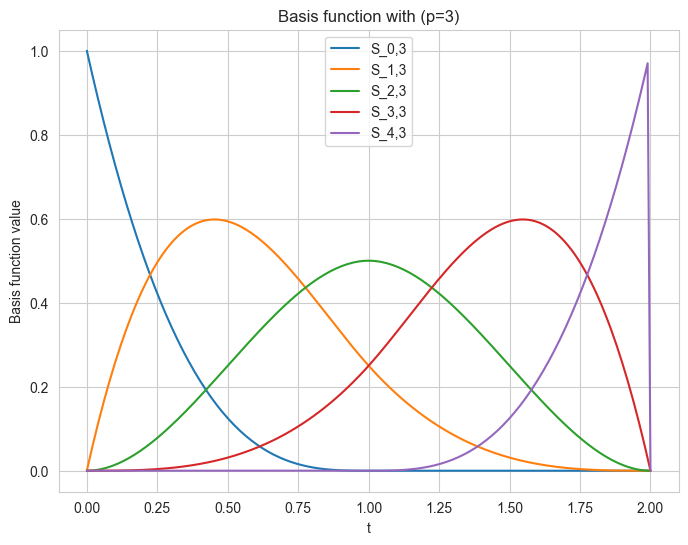

In [20]:
#using no peridio unfirom knots
t_values = np.linspace(0, 2, 200)  
p = 3
knot_vector = np.array([0, 0, 0, 0, 1, 2, 2, 2, 2])  


plot_basis_spline(t_values, knot_vector, p)

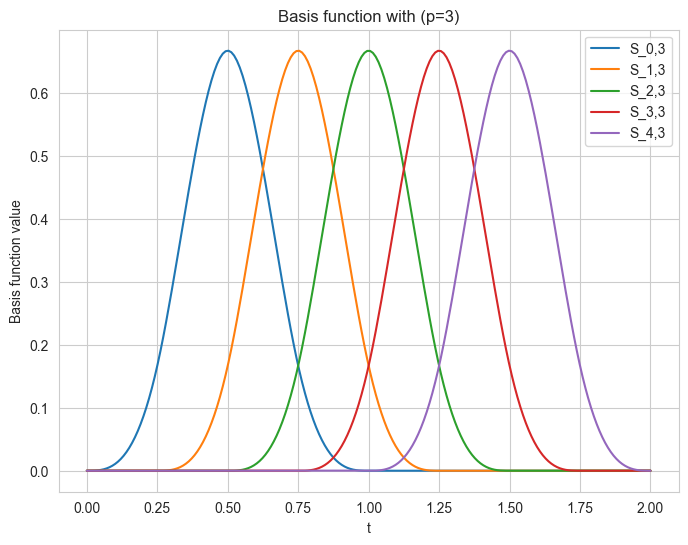

In [21]:
#unifrorm knots 
t_values = np.linspace(0, 2, 200)  
p = 3
knot_vector = np.linspace(0,2,9)


plot_basis_spline(t_values, knot_vector, p)

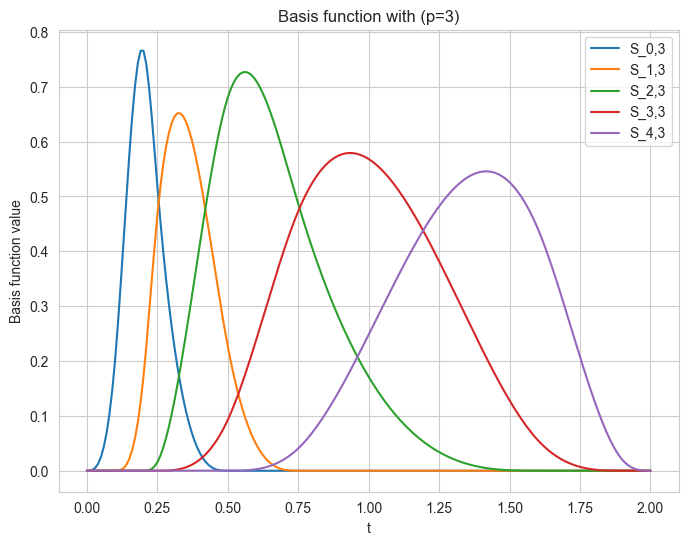

In [22]:
#non unifrorm knots 
t_values = np.linspace(0, 2, 200)  
p = 3
knot_vector = np.array([0,0.1,0.2,0.25,0.5,0.75,1.6,1.9,2])


plot_basis_spline(t_values, knot_vector, p)

#### **Fourier as basis**

$$
\phi_F(x) = \sum_{i=1}^{d} \sum_{k=1}^{g} \left( \cos(k x_i) \cdot a_{ik} + \sin(k x_i) \cdot b_{ik} \right)
$$


In [23]:
def fourier_basis(x_inp, g_,a,b):
    
    ndim = x_inp.shape[1]

    x_trans = np.full((x_inp.shape[0], x_inp.shape[1]), 0.0)
    for i in range(ndim):
        for j in range(g_):
            # print(j)
            t = np.cos(j * x_inp[:,i]) * a[i,j] + np.sin(j * x_inp[:,i])   * b[i,j]  
            x_trans[:, i] += t 

    return x_inp, x_trans 

In [ ]:
x = np.linspace(-np.pi, np.pi, 400).reshape(-1,1)
# x[:,1].shape
a = np.random.rand(1,5) 
b = np.random.rand(1,5)

x, y = fourier_basis(x,5,a,b)

In [25]:
y[:5]

array([[1.87317935],
       [2.22480976],
       [2.54394435],
       [2.81831787],
       [3.03755637]])

In [26]:
x.shape,y.shape

((400, 1), (400, 1))

Text(0, 0.5, 'f(x)')

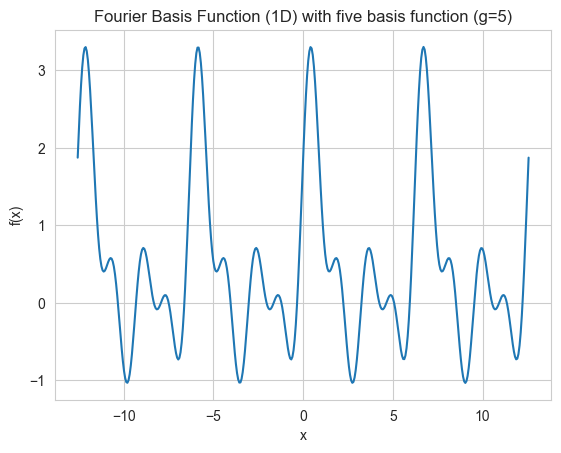

In [27]:
sns.set_style("whitegrid")
sns.lineplot(x=x.ravel(), y=y.ravel())  
plt.title('Fourier Basis Function (1D) with five basis function (g=5)')
plt.xlabel('x')
plt.ylabel('f(x)')

In [32]:
x = np.linspace(-np.pi, np.pi, 400).reshape(-1,1)

a = np.random.rand(1,2) 
b = np.random.rand(1,2)

x, y = fourier_basis(x,2,a,b)

Text(0, 0.5, 'f(x)')

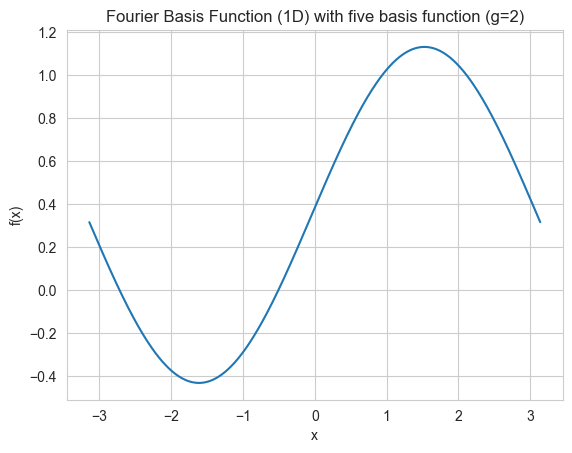

In [34]:
sns.set_style("whitegrid")
sns.lineplot(x=x.ravel(), y=y.ravel())  
plt.title('Fourier Basis Function (1D) with five basis function (g=2)')
plt.xlabel('x')
plt.ylabel('f(x)')